In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1

In [4]:
insurance = pd.read_csv("../datasets/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# age distribution

print(min(insurance["age"]), max(insurance["age"]))

18 64


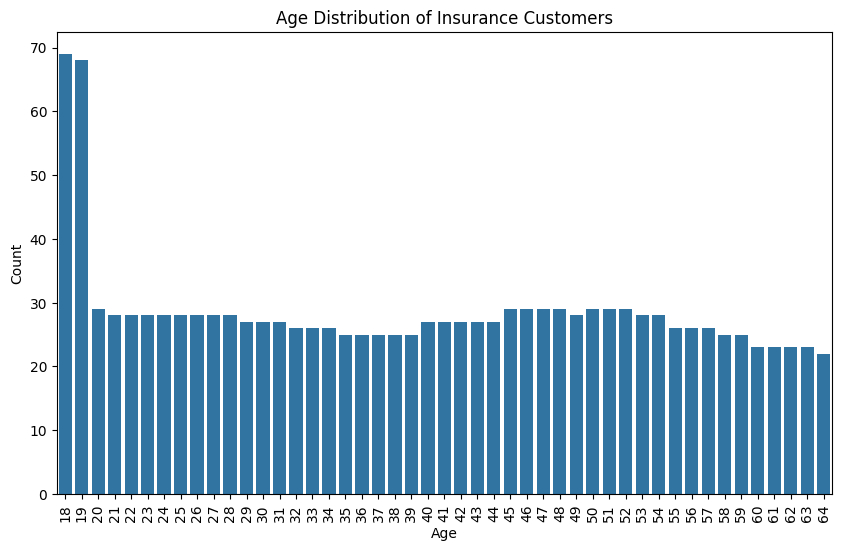

In [15]:
age_counts = insurance["age"].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title("Age Distribution of Insurance Customers")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

There seems to be twice as many 18/19 year olds than any other age demographic 
in the dataset. This may introduce some skew bias into the dataset given that 
young adults are generally healthy and not in need of incurring large insurance
costs.

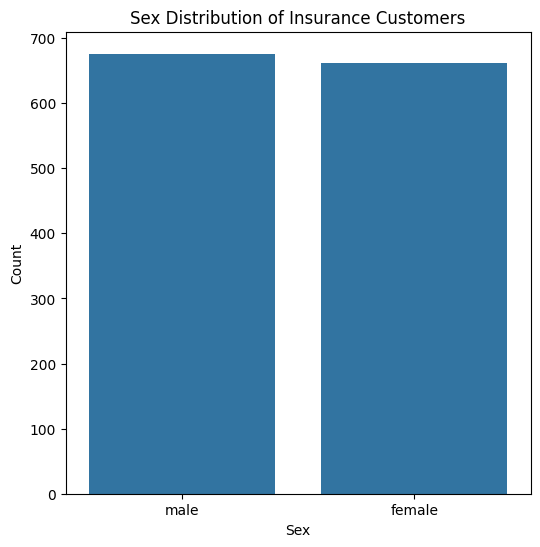

In [16]:
# sex distribution
sex_counts = insurance["sex"].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title("Sex Distribution of Insurance Customers")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

The sex distribution is pretty balanced for the dataset.

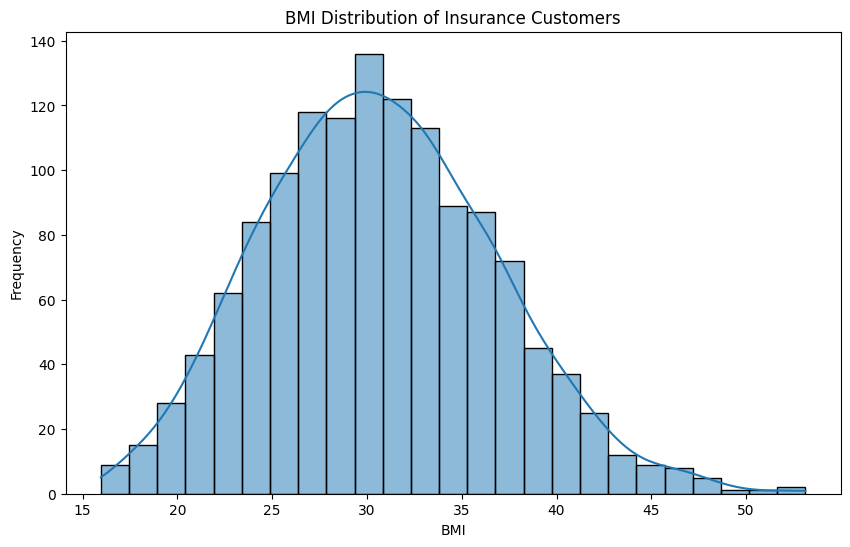

In [17]:
# bmi distribution
plt.figure(figsize=(10,6))
sns.histplot(insurance["bmi"], kde=True)
plt.title("BMI Distribution of Insurance Customers")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

The BMI distribution appears to be approximately normal, with a slight right skew. 
The majority of customers have a BMI between 25 and 35, with fewer customers at 
the extreme low and high ends of the BMI spectrum, but more customers leaning 
towards higher BMI's.

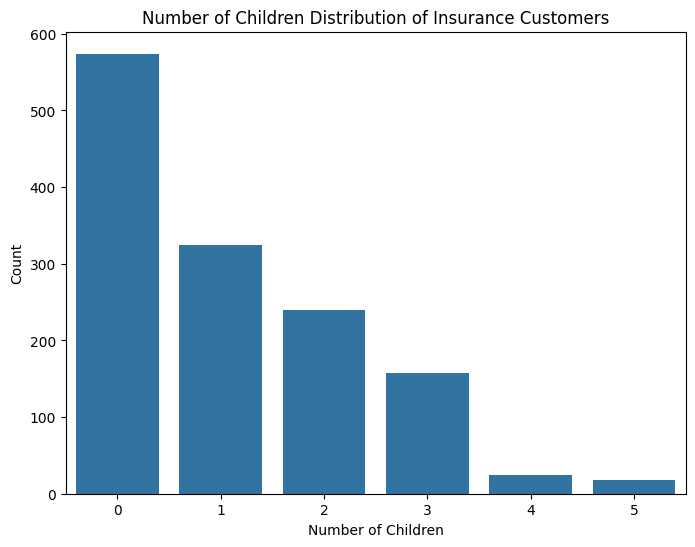

In [18]:
# children distribution
children_counts = insurance["children"].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(x=children_counts.index, y=children_counts.values)
plt.title("Number of Children Distribution of Insurance Customers")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

The majority of customers have <3 children, with 0 children being the most common. 
This is pretty common for families and shoudn't introduce any large bias into 
the dataset.

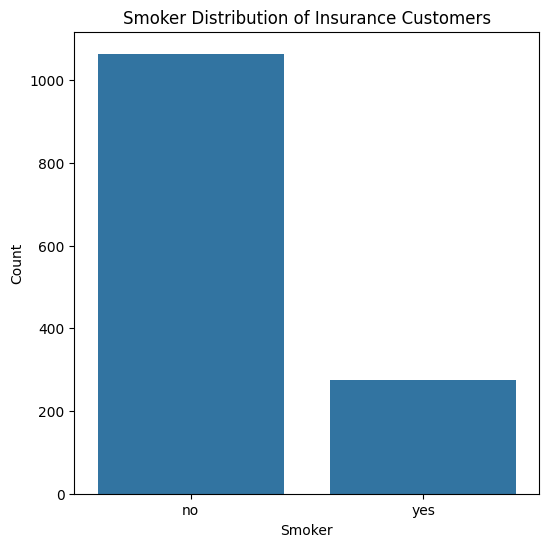

In [19]:
# smoker distribution
smoker_counts = insurance["smoker"].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=smoker_counts.index, y=smoker_counts.values)
plt.title("Smoker Distribution of Insurance Customers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

The vast majority of customers in the dataset are not smokers. As smokers generally 
tend to experience health issues as they grow older, this may be interesting to 
analyze for the small subgroup of smokers.

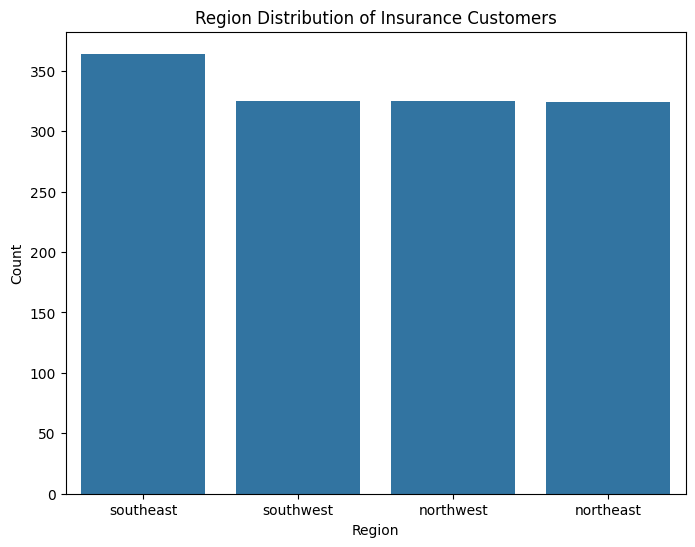

In [20]:
# region distribution
region_counts = insurance["region"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Region Distribution of Insurance Customers")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Customer regions are relatively well balanced.

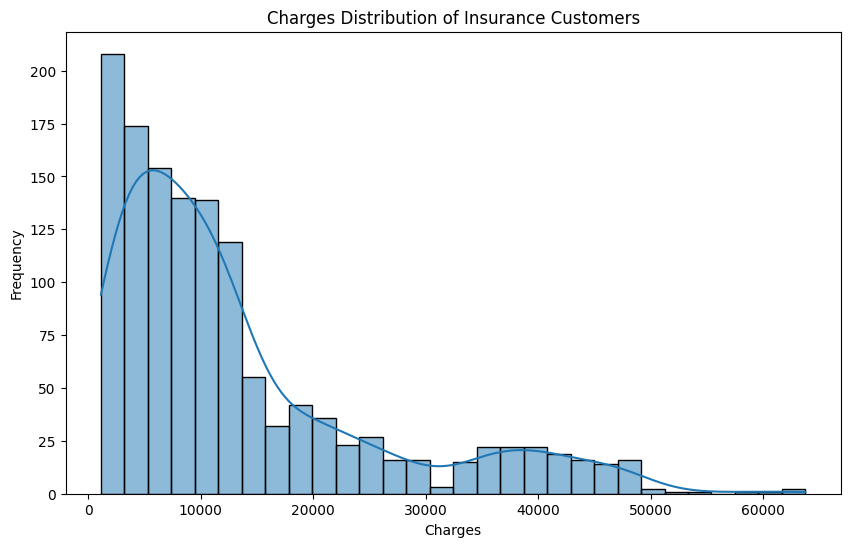

In [21]:
# charges distribution
plt.figure(figsize=(10,6))
sns.histplot(insurance["charges"], kde=True)
plt.title("Charges Distribution of Insurance Customers")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Multimodal distribution of insurance charges accrued by customers. It would be 
interesting to analyze the far outliers near 60k+, as well as the peaks around 
5k and 40k.

# 2

Lantz utilizes the dataset to identify prevalent, well known conditions for smokers 
and people who are obese. He writes "[t]he goal of this analysis is to use patient 
data to estimate the average medical care expenses for such population segments. 
These estimates could be used to create actuarial tables which set the price of 
yearly premiums higher or lower depending on the expected treatment costs." Lantz 
utilizes all the predictors in the datset (age, sex, bmi, # of children, smoker, 
region) to predict our singular response variable (insurance charge). 

# 3

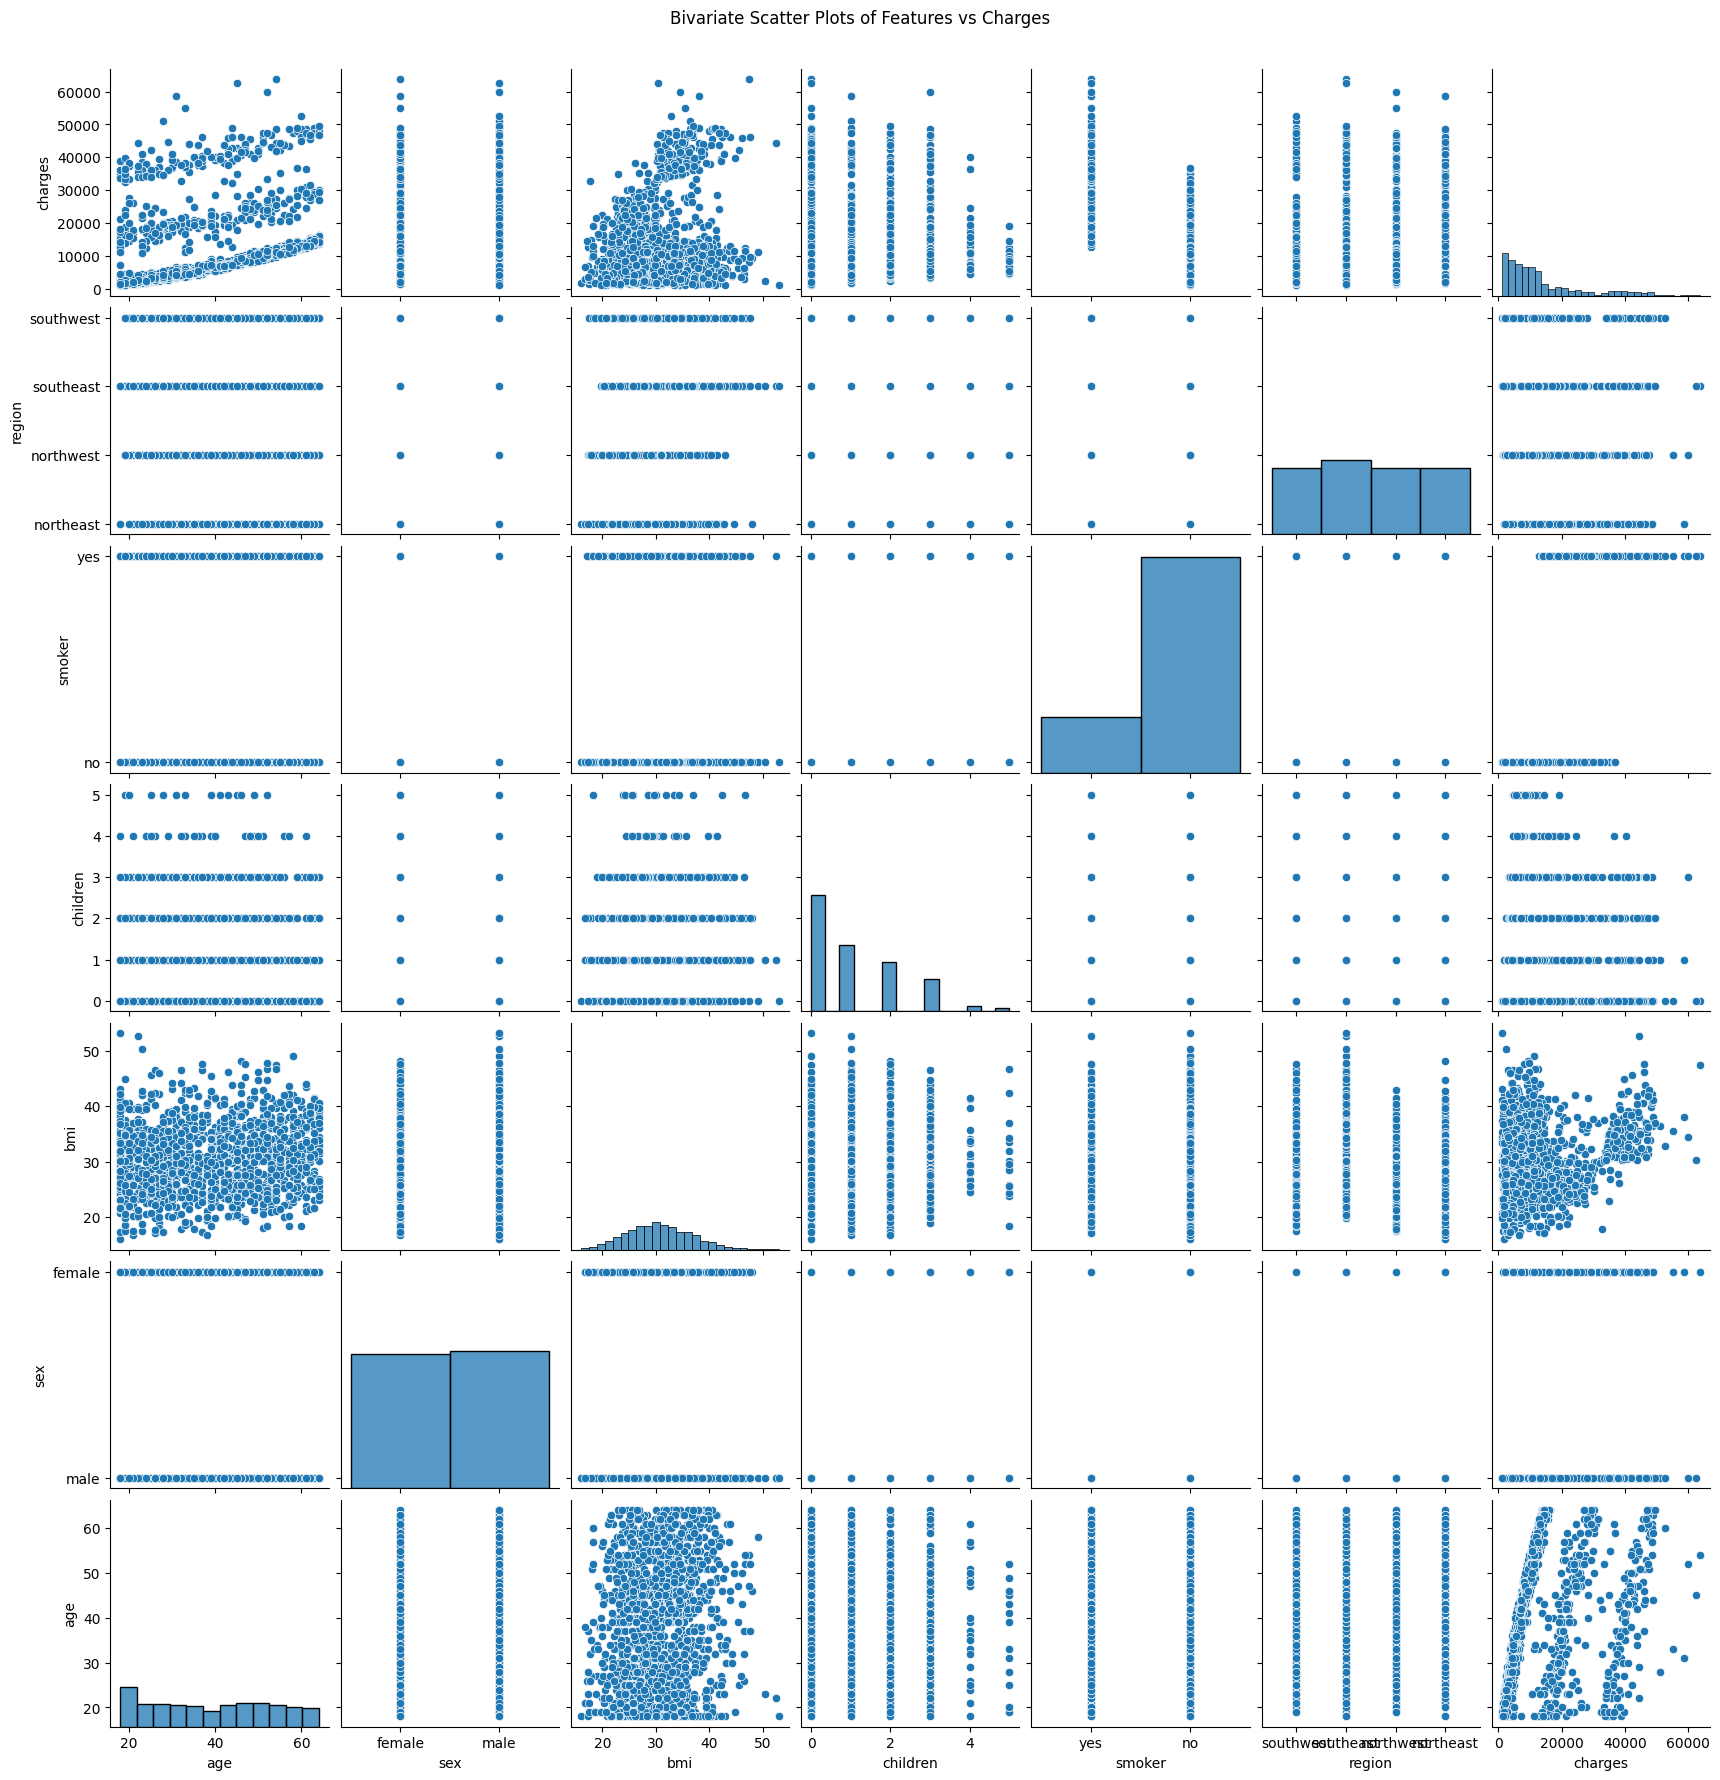

In [27]:
vars = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
sns.pairplot(insurance, y_vars=vars[::-1], x_vars=vars)
plt.suptitle("Bivariate Scatter Plots of Features vs Charges", y=1.02)
plt.show()

There doesn't seem to be any correlation between predictors. As Lantz noted, we do
also see a positive correlation between age and charges in 3 separate groups, and 
bmi and charges have two clusters. Otherwise, there doesn't seem to be any other
notable correlations off the bat between the features and response variable alone.

**LLM Usage**: All work was done by myself in VSCode with [GitHub Copilot integration](https://code.visualstudio.com/docs/copilot/overview). The integration "provides code suggestions, explanations, and automated implementations based on natural language prompts and existing code context," and also offers autonomous coding and an in-IDE chat interface that is able to interact with the current codebase. Only the Copilot provided automatic inline suggestions for both LaTex and Python in `.tex` and `.ipynb` Jupyter notebook files respectively were taken into account / used.